# Analisi Esplorativa del Dataset

> **Nota**: questo notebook ha uno scopo esclusivamente esplorativo.  
> Viene utilizzato per visualizzare il comportamento del segnale WiFi all'interno dell'edificio e analizzare la distribuzione delle rilevazioni per ciascun Access Point (AP).

Le visualizzazioni principali qui presenti sono incluse anche nel notebook `main.ipynb`, che rappresenta il workflow completo del progetto.

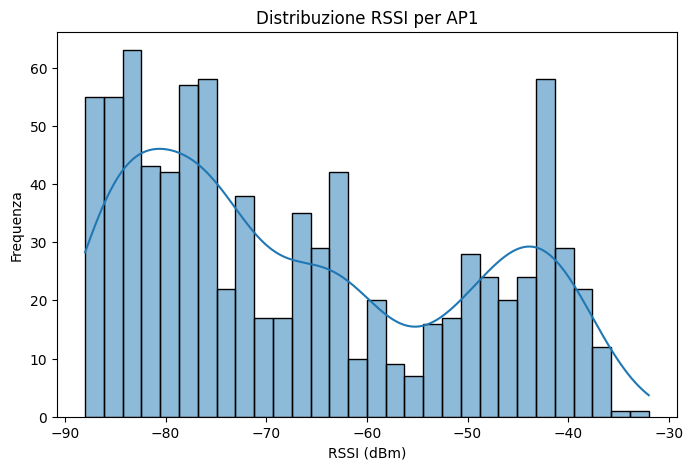

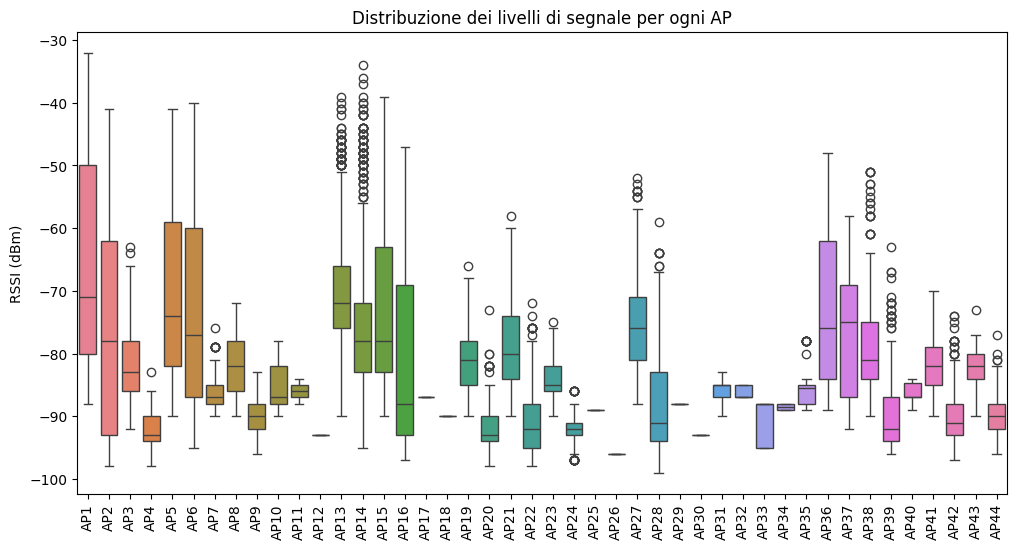

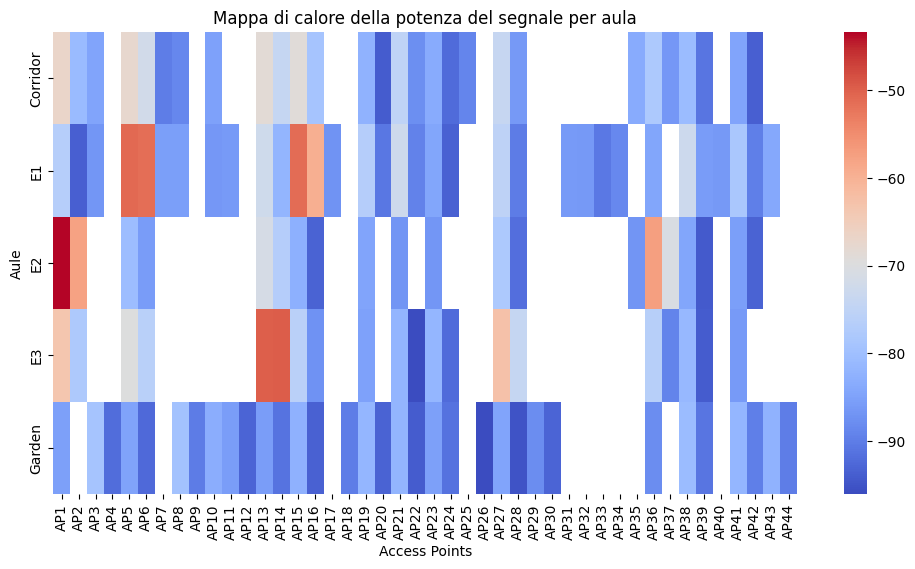

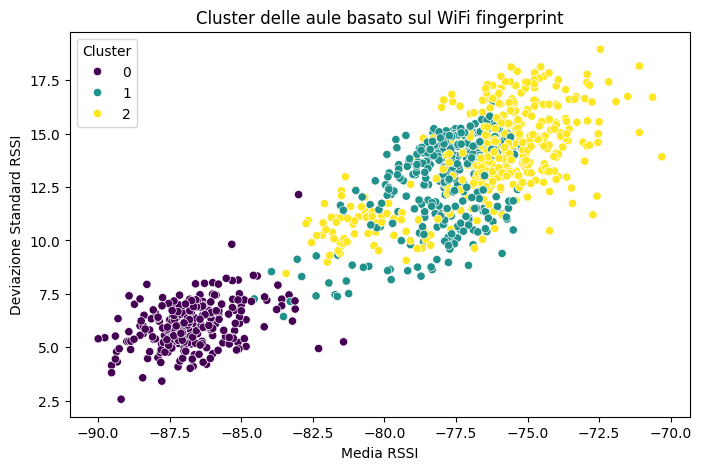

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Caricamento del dataset
file_path = "../../data/raw/wifi_fingerprinting_dataset_raw.csv"
df = pd.read_csv(file_path)

# Rimozione delle colonne non numeriche
ap_columns = [col for col in df.columns if "AP" in col]

# 1. Istogramma della distribuzione dell’RSSI per un determinato AP
ap_to_plot = "AP1"
plt.figure(figsize=(8, 5))
sns.histplot(df[ap_to_plot].dropna(), bins=30, kde=True)
plt.title(f"Distribuzione RSSI per {ap_to_plot}")
plt.xlabel("RSSI (dBm)")
plt.ylabel("Frequenza")
plt.show()

# 2. Boxplot per confrontare la distribuzione dei segnali tra diversi AP
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[ap_columns])
plt.xticks(rotation=90)
plt.title("Distribuzione dei livelli di segnale per ogni AP")
plt.ylabel("RSSI (dBm)")
plt.show()

# 3. Heatmap della potenza del segnale per ogni aula
pivot_df = df.groupby("Aula")[ap_columns].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="coolwarm", annot=False)
plt.title("Mappa di calore della potenza del segnale per aula")
plt.xlabel("Access Points")
plt.ylabel("Aule")
plt.show()

# 4. Clustering delle aule basato sulla fingerprint WiFi
X = df[ap_columns].fillna(-100)  # Sostituiamo i NaN con un valore di segnale basso
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[ap_columns].mean(axis=1), y=df[ap_columns].std(axis=1), hue=df["Cluster"], palette="viridis")
plt.xlabel("Media RSSI")
plt.ylabel("Deviazione Standard RSSI")
plt.title("Cluster delle aule basato sul WiFi fingerprint")
plt.show()



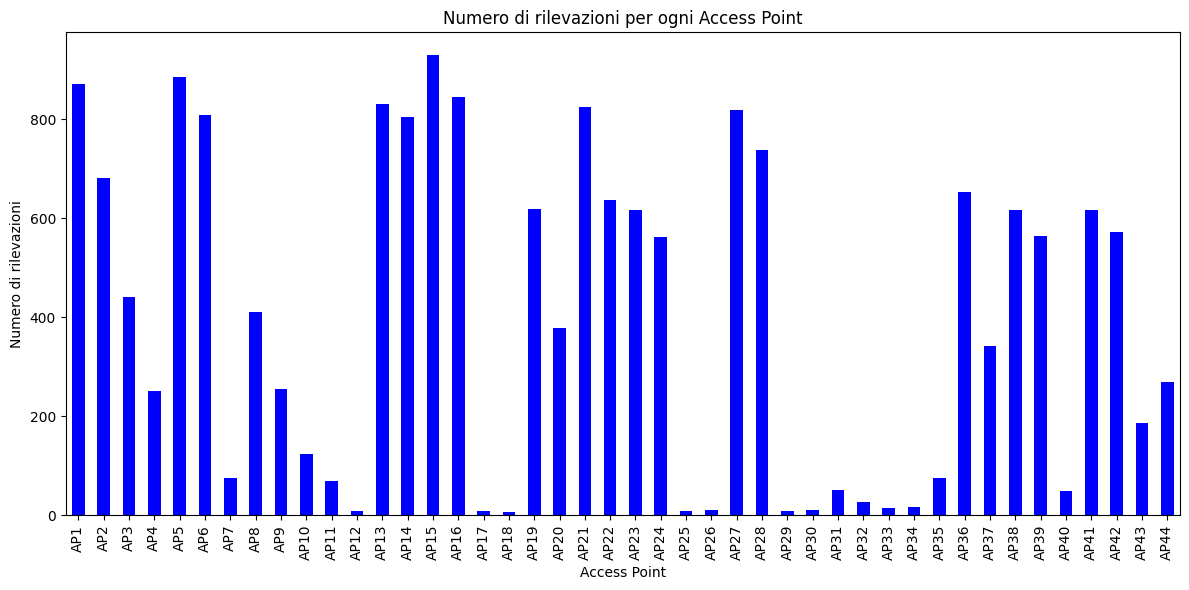

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento del dataset
file_path = "../../data/raw/wifi_fingerprinting_dataset_raw.csv"
df = pd.read_csv(file_path)

# Filtriamo le colonne che rappresentano gli Access Point (AP)
ap_columns = [col for col in df.columns if "AP" in col]

# Contiamo il numero di rilevazioni (valori non nulli) per ogni AP
ap_counts = df[ap_columns].notnull().sum()

# Ordiniamo gli AP in ordine naturale
ap_counts = ap_counts.reindex(sorted(ap_columns, key=lambda x: int(x[2:])))

# Creiamo il grafico a barre
plt.figure(figsize=(12, 6))
ap_counts.plot(kind='bar', color='blue')
plt.title("Numero di rilevazioni per ogni Access Point")
plt.xlabel("Access Point")
plt.ylabel("Numero di rilevazioni")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

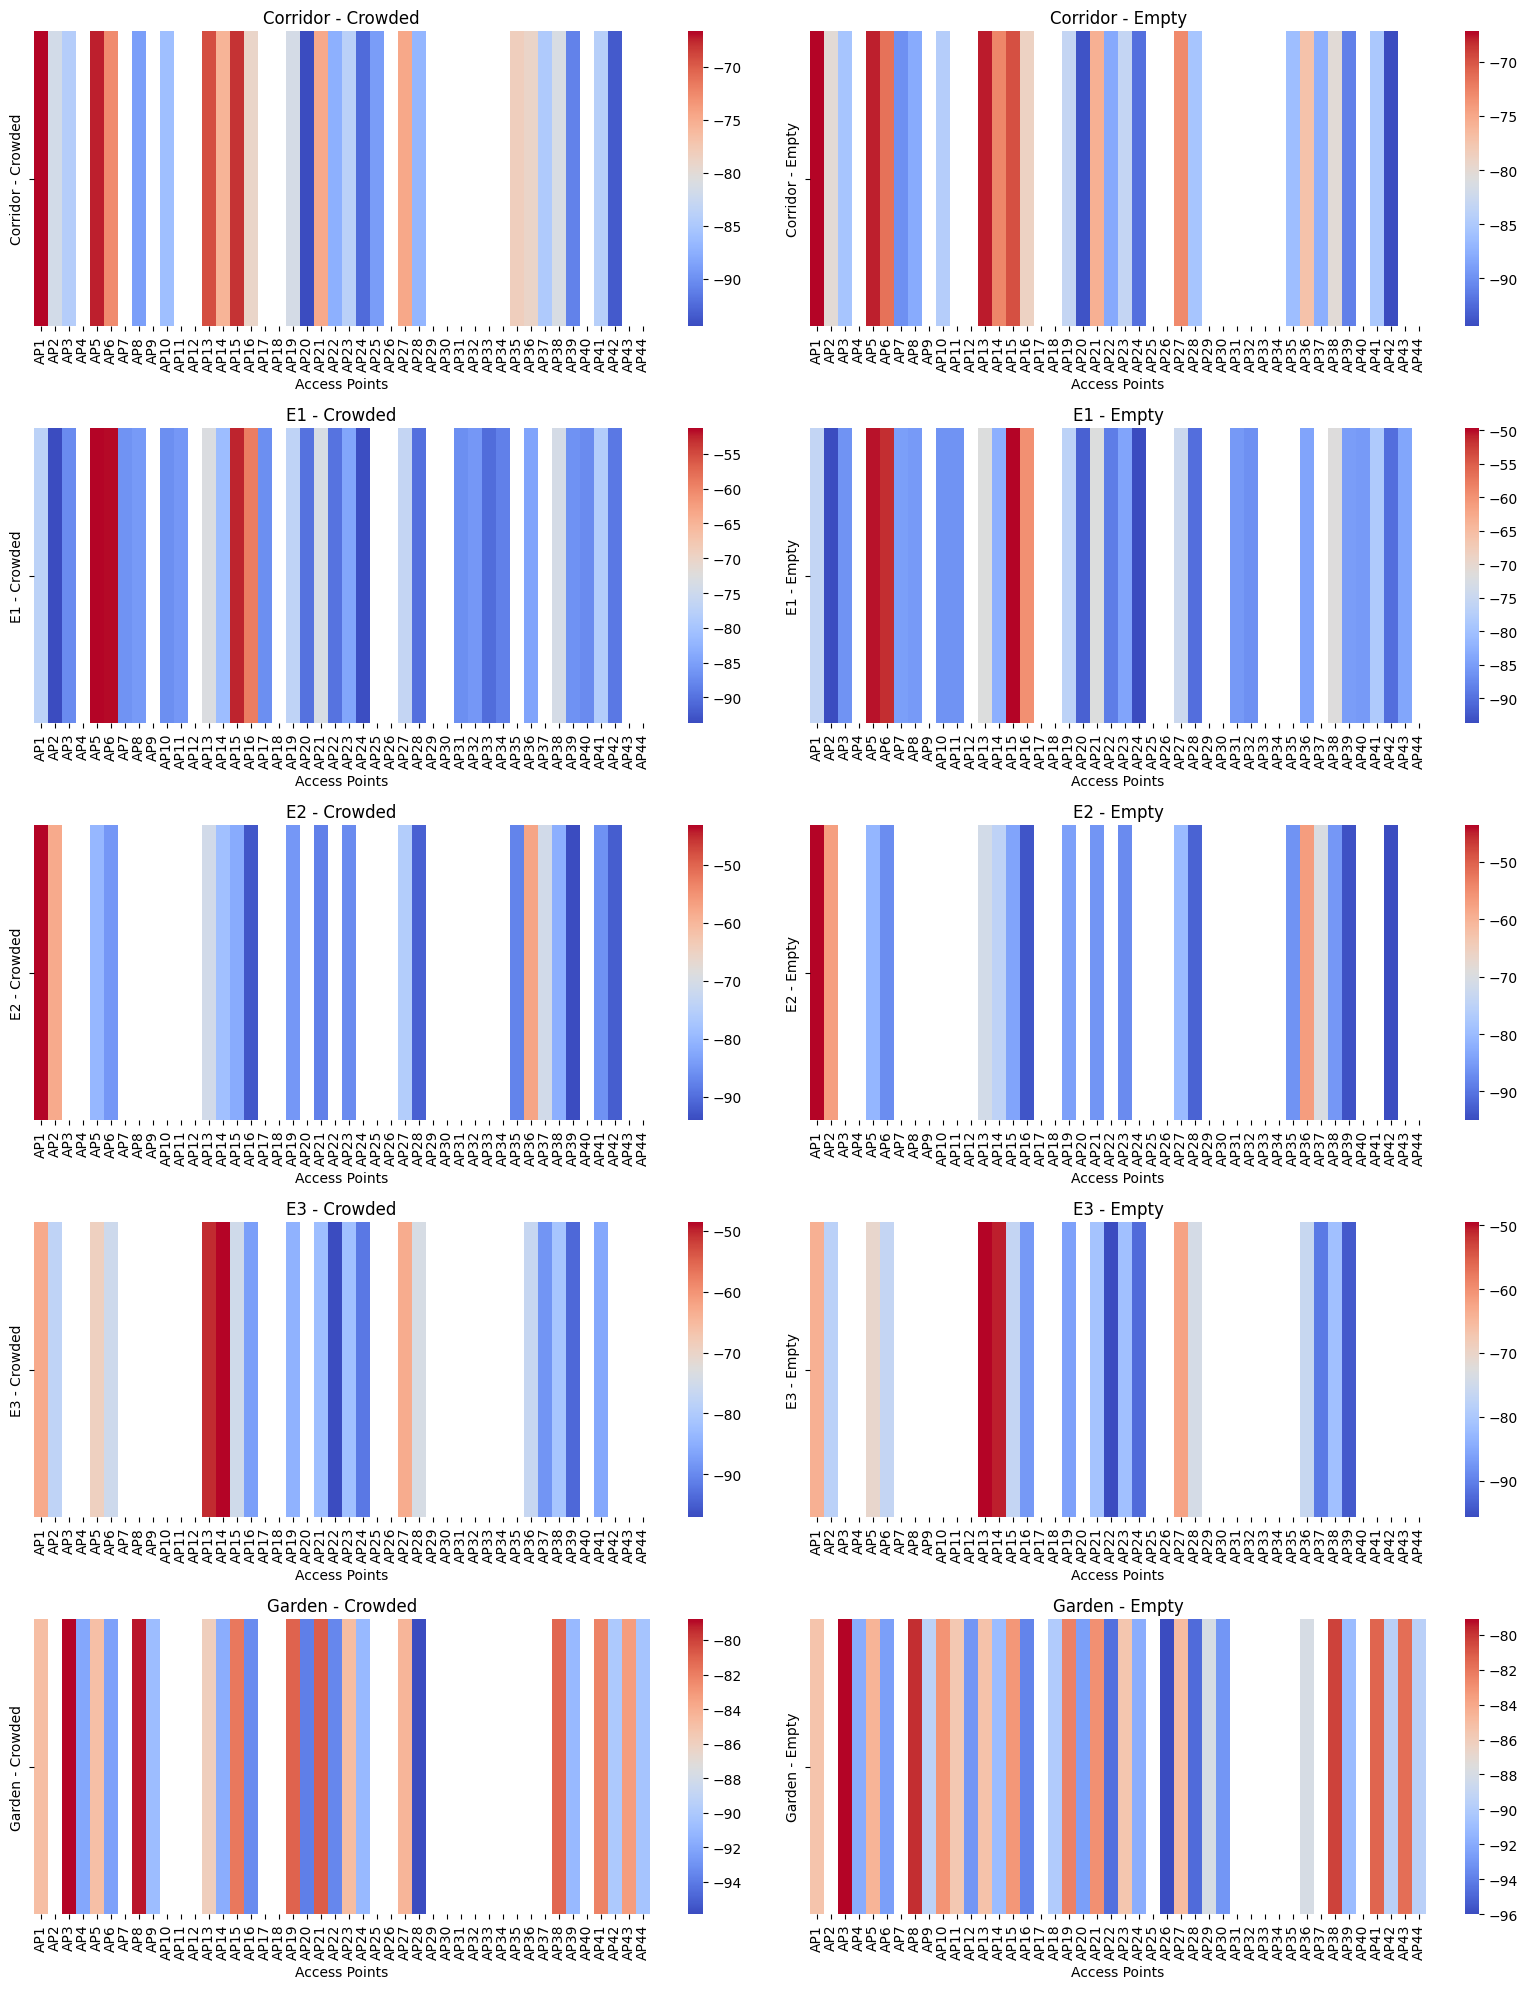

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento del dataset
file_path = "../../data/raw/wifi_fingerprinting_dataset_raw.csv"
df = pd.read_csv(file_path)

# Filtriamo le colonne che rappresentano gli Access Point (AP)
ap_columns = [col for col in df.columns if "AP" in col]

# Raggruppiamo per Aula e Situazione
grouped = df.groupby(["Aula", "Situazione"])[ap_columns].mean()

# Creiamo una griglia per le heatmap
num_plots = len(grouped)
cols = 2  # Numero di colonne nella griglia
rows = (num_plots + cols - 1) // cols  # Calcolo del numero di righe necessario

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()  # Appiattiamo gli assi per un facile accesso

# Generiamo ogni heatmap
for idx, ((aula, situazione), data) in enumerate(grouped.groupby(level=[0, 1])):
    sns.heatmap(data.values.reshape(1, -1), cmap="coolwarm", annot=False, cbar=True,
                xticklabels=ap_columns, yticklabels=[f"{aula} - {situazione}"], ax=axes[idx])
    axes[idx].set_title(f"{aula} - {situazione}")
    axes[idx].set_xlabel("Access Points")
    axes[idx].set_ylabel("")

# Rimuoviamo eventuali assi vuoti
for ax in axes[num_plots:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

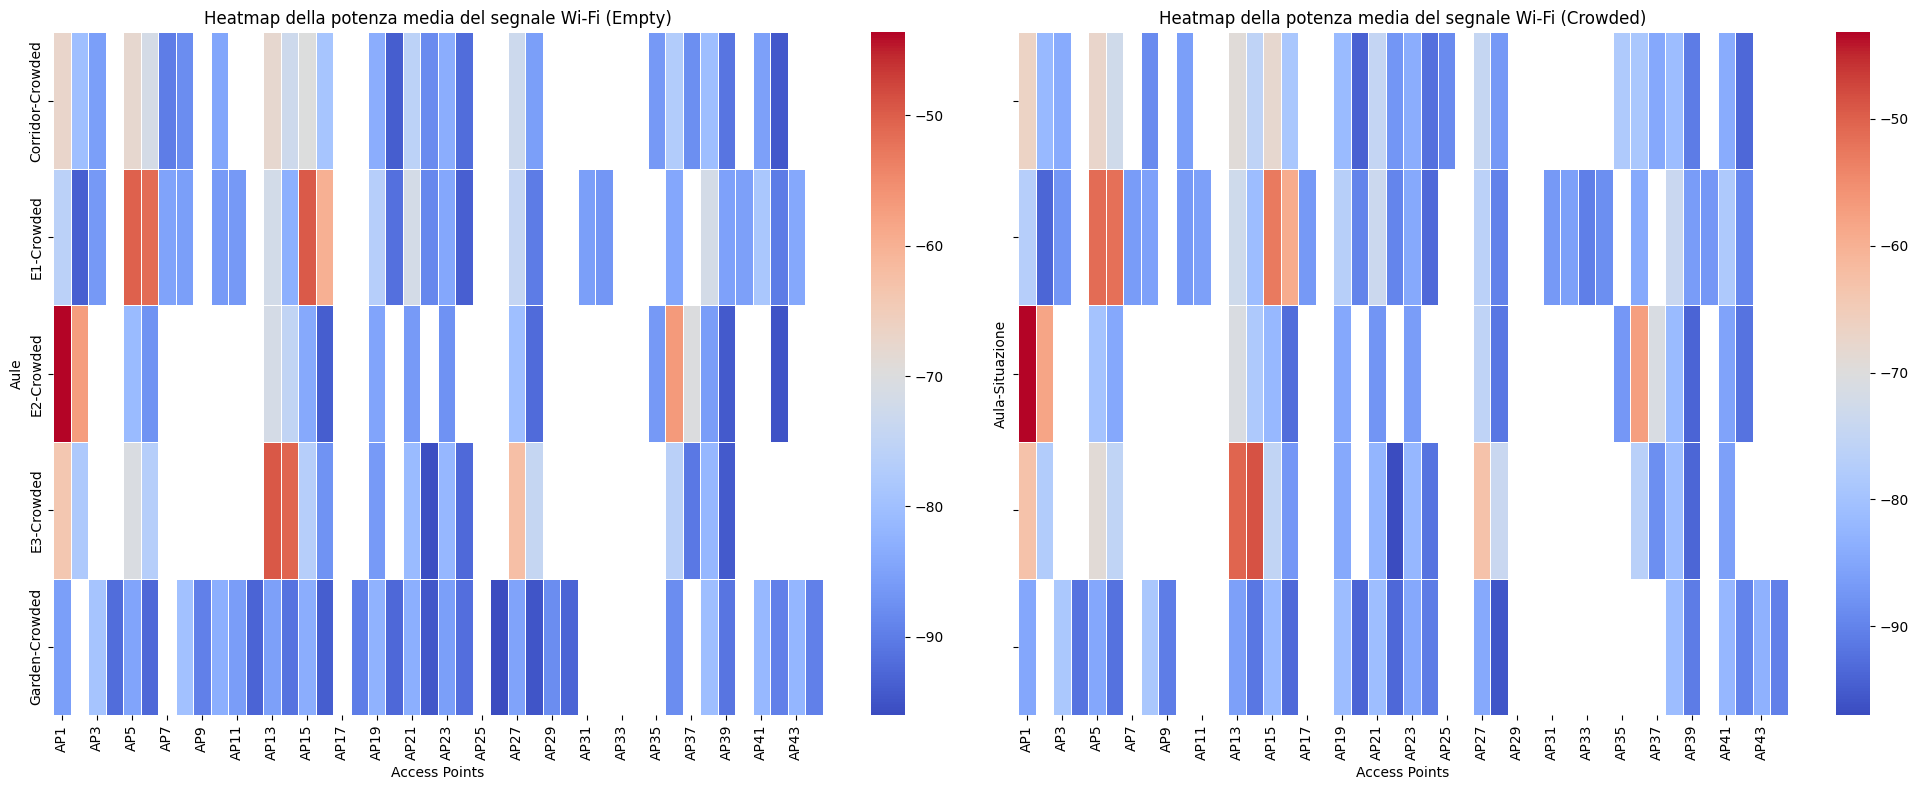

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento del dataset
file_path = "../../data/raw/wifi_fingerprinting_dataset_raw.csv"
df = pd.read_csv(file_path)

# Filtriamo le colonne che rappresentano gli Access Point (AP)
ap_columns = [col for col in df.columns if "AP" in col]

# Calcoliamo la media del segnale per ciascuna combinazione di Aula e Situazione
pivot_df = df.groupby(["Aula", "Situazione"])[ap_columns].mean()

# Creiamo una figura con due sottotrame
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Heatmap per la situazione "Empty"
sns.heatmap(pivot_df.loc[(slice(None), "Empty"), :], cmap="coolwarm", annot=False, cbar=True, linewidths=0.5, ax=axes[0])
axes[0].set_title("Heatmap della potenza media del segnale Wi-Fi (Empty)")
axes[0].set_xlabel("Access Points")
axes[0].set_ylabel("Aule")
axes[0].tick_params(axis='x', rotation=90)

# Heatmap per la situazione "Crowded"
sns.heatmap(pivot_df.loc[(slice(None), "Crowded"), :], cmap="coolwarm", annot=False, cbar=True, linewidths=0.5, ax=axes[1])
axes[1].set_title("Heatmap della potenza media del segnale Wi-Fi (Crowded)")
axes[1].set_xlabel("Access Points")
axes[1].tick_params(axis='x', rotation=90)

# Layout compatto
plt.tight_layout()
plt.show()

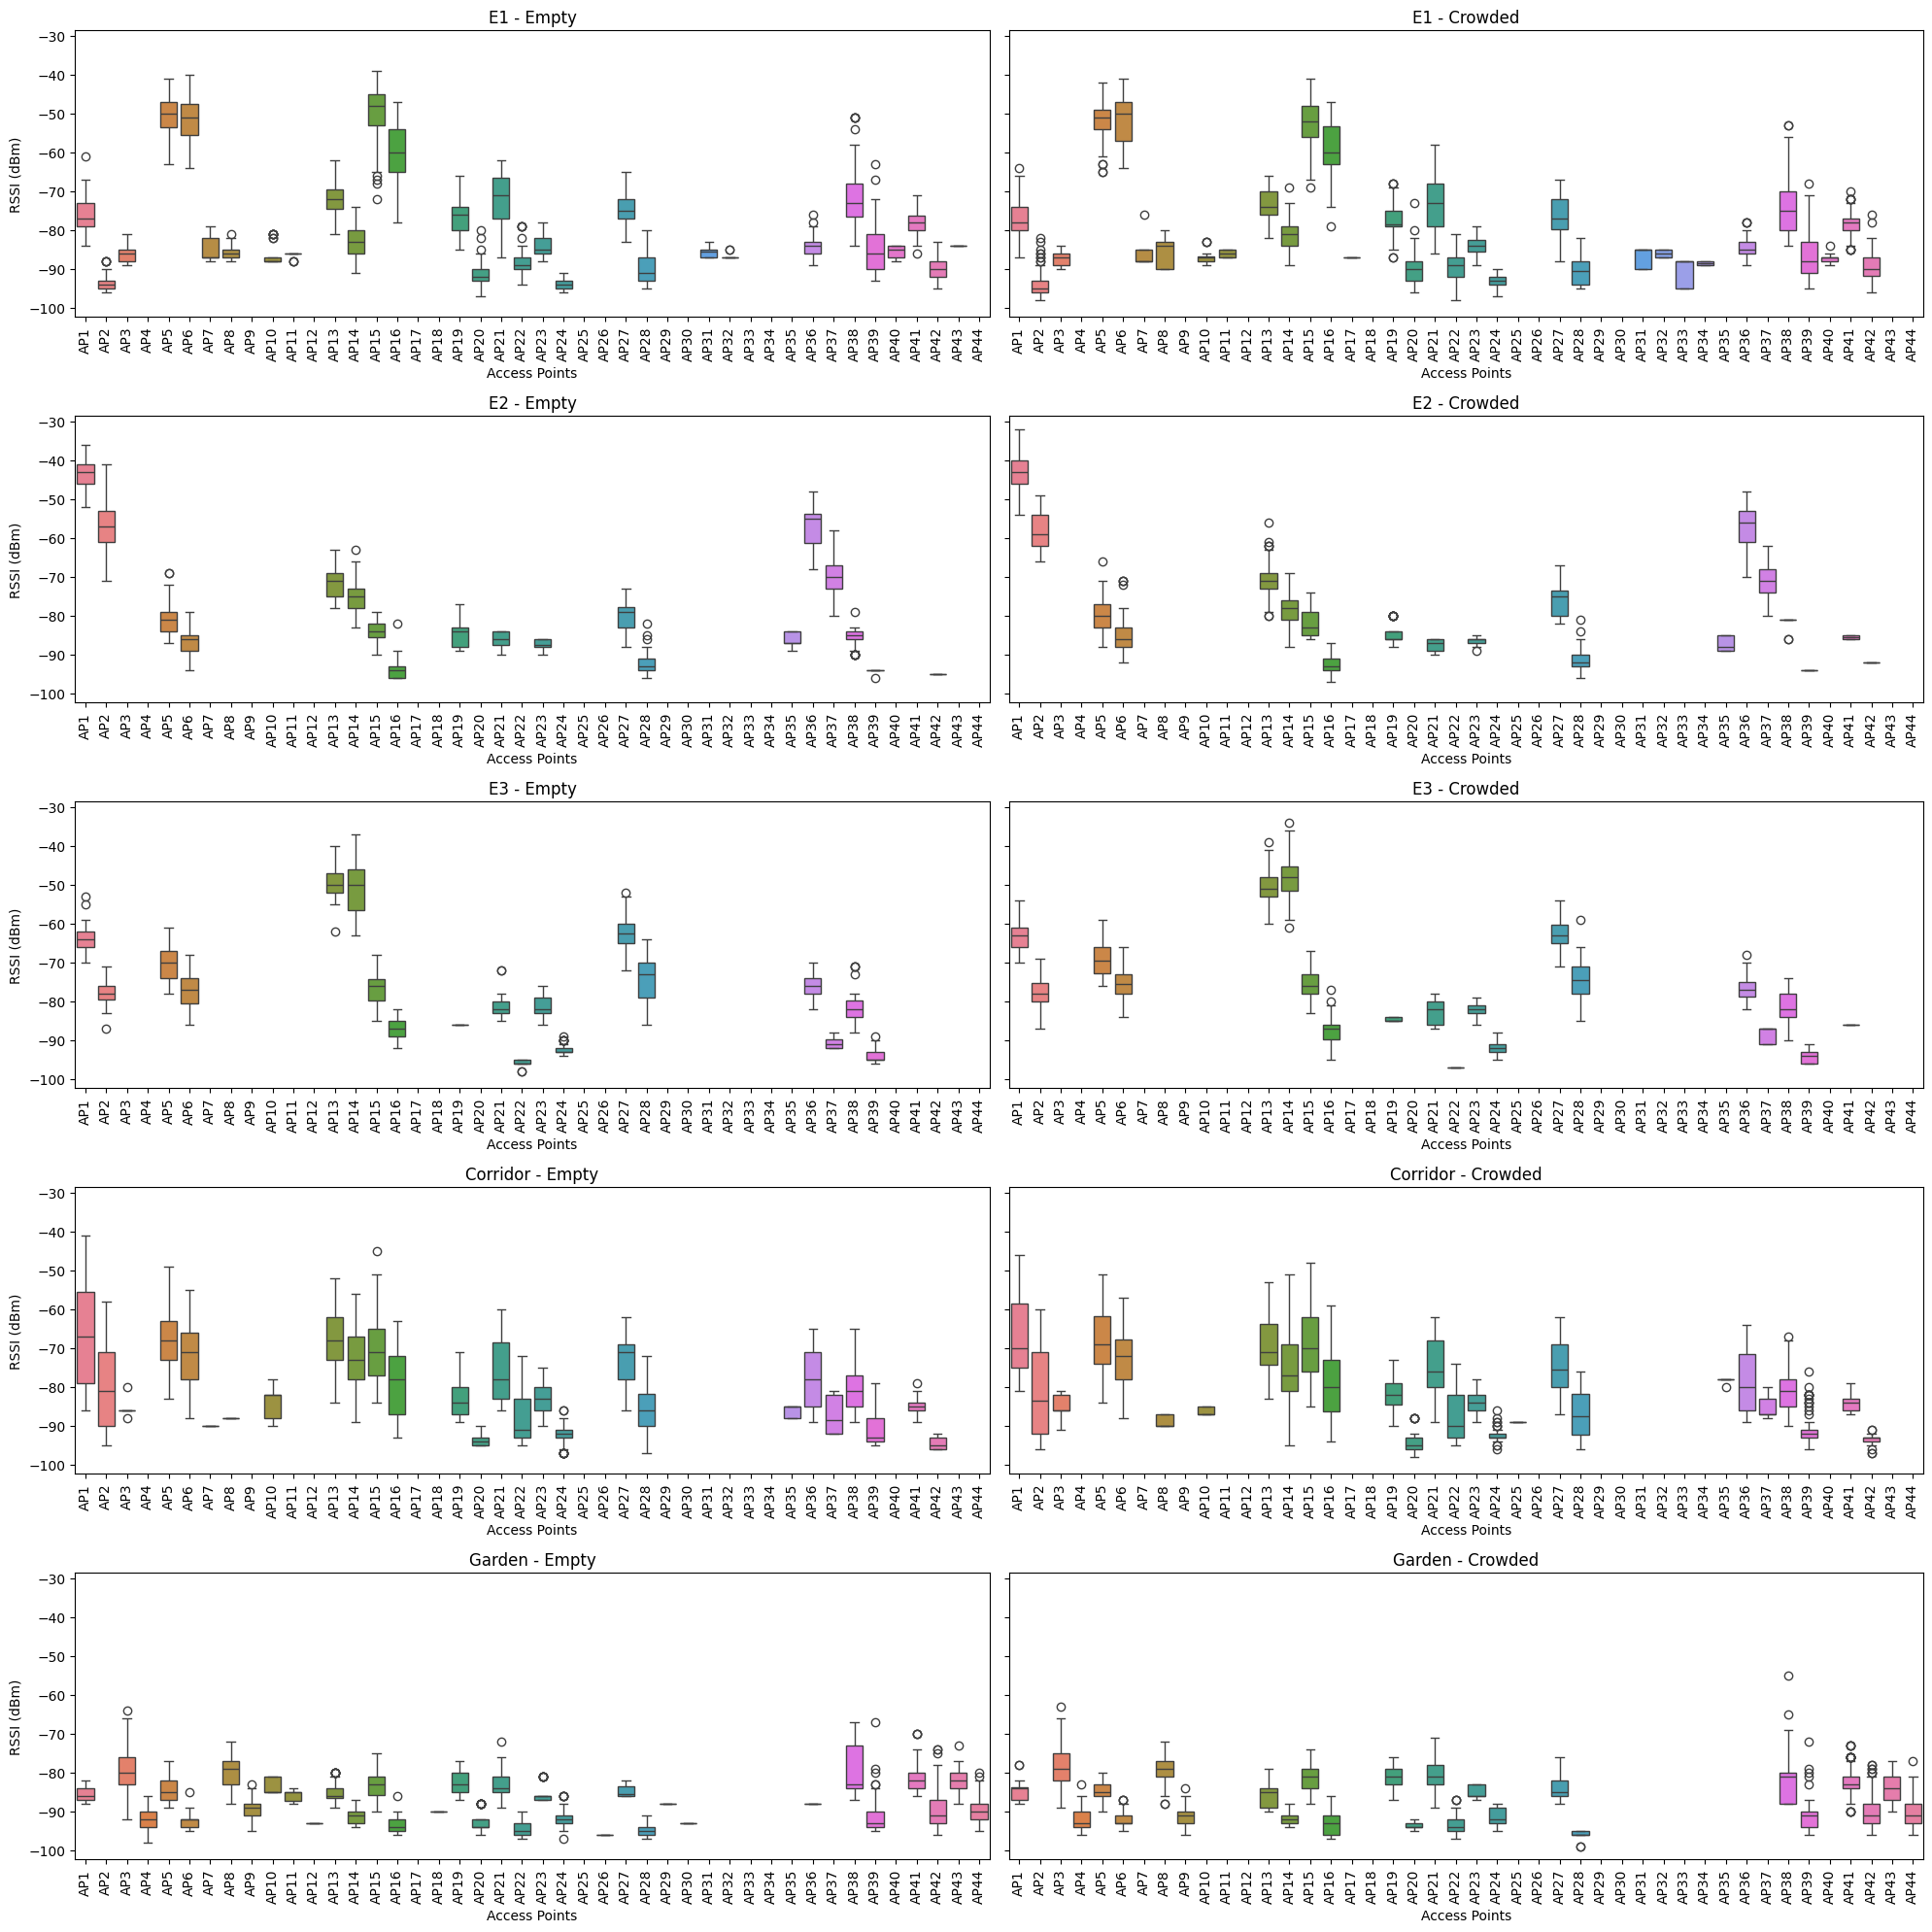

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento del dataset
file_path = "../../data/raw/wifi_fingerprinting_dataset_raw.csv"
df = pd.read_csv(file_path)

# Filtriamo le colonne che rappresentano gli Access Point (AP)
ap_columns = [col for col in df.columns if "AP" in col]

# Separiamo i dati per situazioni Empty e Crowded
empty_data = df[df["Situazione"] == "Empty"]
crowded_data = df[df["Situazione"] == "Crowded"]

# Determiniamo il numero di aule
unique_aule = df["Aula"].unique()
num_plots = len(unique_aule)
cols = 2  # Due colonne: una per Empty e una per Crowded
rows = num_plots  # Una riga per ogni aula

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4), sharey=True)
axes = axes.reshape(rows, cols)  # Riorganizziamo gli assi in una matrice

# Generiamo i boxplot per le situazioni Empty (colonna sinistra)
for idx, aula in enumerate(unique_aule):
    subset_empty = empty_data[empty_data["Aula"] == aula]
    sns.boxplot(data=subset_empty[ap_columns], ax=axes[idx, 0])
    axes[idx, 0].set_title(f"{aula} - Empty")
    axes[idx, 0].set_xlabel("Access Points")
    axes[idx, 0].set_ylabel("RSSI (dBm)")
    axes[idx, 0].tick_params(axis='x', rotation=90)

# Generiamo i boxplot per le situazioni Crowded (colonna destra)
for idx, aula in enumerate(unique_aule):
    subset_crowded = crowded_data[crowded_data["Aula"] == aula]
    sns.boxplot(data=subset_crowded[ap_columns], ax=axes[idx, 1])
    axes[idx, 1].set_title(f"{aula} - Crowded")
    axes[idx, 1].set_xlabel("Access Points")
    axes[idx, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()